In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))


['cell_images']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns

import os
from PIL import Image

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
parasitized_data = os.listdir('../input/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../input/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C59P20thinF_IMG_20150803_112802_cell_196.png', 'C110P71ThinF_IMG_20150930_110052_cell_242.png', 'C183P144NThinF_IMG_20151201_222119_cell_137.png', 'C124P85ThinF_IMG_20151002_154808_cell_137.png', 'C99P60ThinF_IMG_20150918_141001_cell_108.png', 'C48P9thinF_IMG_20150721_160944_cell_212.png', 'C180P141NThinF_IMG_20151201_170021_cell_33.png', 'C124P85ThinF_IMG_20151002_153825_cell_192.png', 'C180P141NThinF_IMG_20151201_164714_cell_189.png', 'C59P20thinF_IMG_20150803_112802_cell_170.png']


['C130P91ThinF_IMG_20151004_142951_cell_89.png', 'C90P51ThinF_IMG_20150821_115310_cell_196.png', 'C129P90ThinF_IMG_20151004_133244_cell_49.png', 'C211ThinF_IMG_20151029_163959_cell_43.png', 'C222ThinF_IMG_20151115_151211_cell_65.png', 'C147P108ThinF_IMG_20151115_095606_cell_78.png', 'C220ThinF_IMG_20151106_154339_cell_181.png', 'C169P130ThinF_IMG_20151118_173039_cell_106.png', 'C129P90ThinF_IMG_20151004_133329_cell_81.png', 'C231ThinF_IMG_20151112_153147_cell_199.png']


**DATA VISUALIZATION**[](http://)

**1. PARASITIZED DATA**

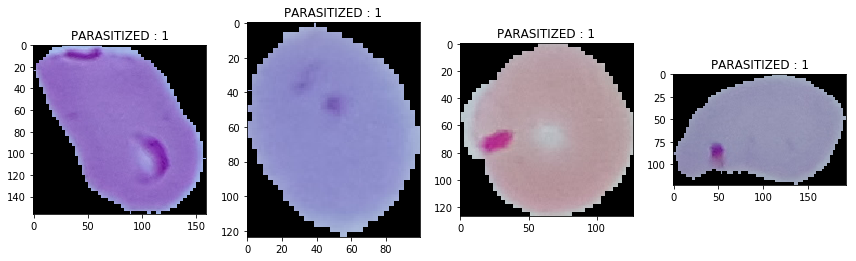

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

**2. UNINFECTTED DATA**

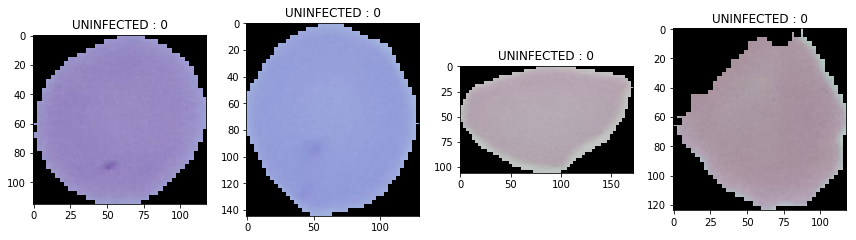

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

**One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.**

In [6]:
data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

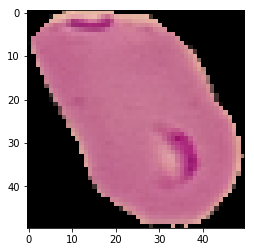

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [9]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [12]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


* **BUILDING THE CNN MODEL (without data augmentation)**

In [13]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [14]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [15]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [16]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [17]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 10s 463us/step - loss: 0.5498 - acc: 0.7634
Epoch 2/20
22046/22046 [==============================] - 6s 272us/step - loss: 0.2165 - acc: 0.9201
Epoch 3/20
22046/22046 [==============================] - 7s 321us/step - loss: 0.1813 - acc: 0.9369
Epoch 4/20
22046/22046 [==============================] - 7s 310us/step - loss: 0.1727 - acc: 0.9404
Epoch 5/20
22046/22046 [==============================] - 6s 278us/step - loss: 0.1696 - acc: 0.9441
Epoch 6/20
22046/22046 [==============================] - 6s 282us/step - loss: 0.1606 - acc: 0.9472
Epoch 7/20
22046/22046 [==============================] - 6s 272us/step - loss: 0.1576 - acc: 0.9476
Epoch 8/20
22046/22046 [==============================] - 6s 286us/step - loss: 0.1534 - acc: 0.9506
Epoch 9/20
22046/22046 [==============================] - 6s 286us/step - loss: 0.1503 - acc: 0.9496
Epoch 10/20
22046/22046 [==============================] - 6s 283us/step - loss: 0.1474 - 

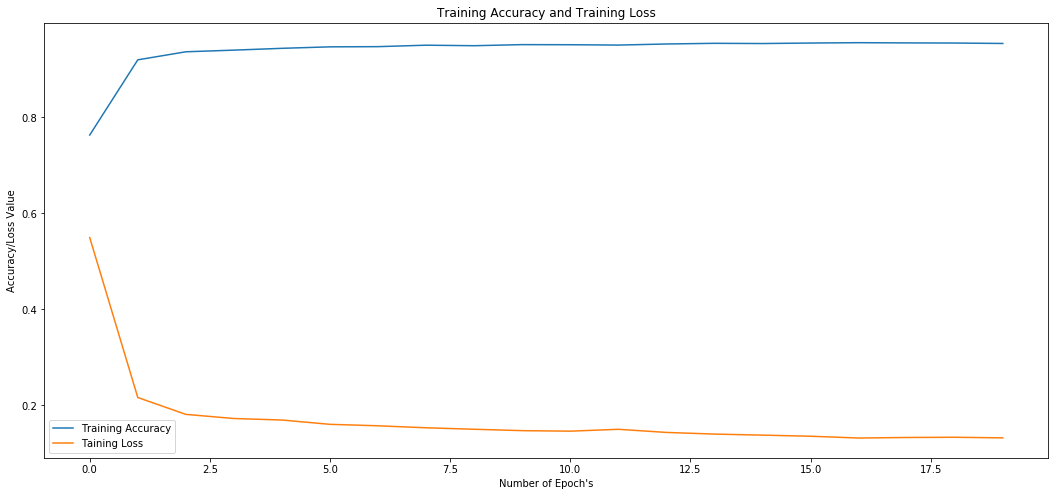

In [18]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [19]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 1s 109us/step


In [20]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1394034275252518
ACCURACY : 0.9524673439767779


**The performance of the model on the test data seems to fairly good with 95.77% accuracy.**

**WITH DATA AUGMENTATION**

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [24]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [25]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [26]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 21s 60ms/step - loss: 0.8170 - acc: 0.6070
Epoch 2/50
344/344 [==============================] - 19s 55ms/step - loss: 0.5105 - acc: 0.7537
Epoch 3/50
344/344 [==============================] - 19s 55ms/step - loss: 0.3739 - acc: 0.8434
Epoch 4/50
344/344 [==============================] - 20s 57ms/step - loss: 0.3274 - acc: 0.8712
Epoch 5/50
344/344 [==============================] - 19s 55ms/step - loss: 0.3045 - acc: 0.8845
Epoch 6/50
344/344 [==============================] - 19s 54ms/step - loss: 0.2899 - acc: 0.8933
Epoch 7/50
344/344 [==============================] - 20s 59ms/step - loss: 0.2845 - acc: 0.8960
Epoch 8/50
344/344 [==============================] - 19s 54ms/step - loss: 0.2775 - acc: 0.8973
Epoch 9/50
344/344 [==============================] - 19s 56ms/step - loss: 0.2697 - acc: 0.9034
Epoch 10/50
344/344 [==============================] - 19s 55ms/step - loss: 0.2690 - acc: 0.9046
Epoch 11/50
344/344 [========

In [27]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [28]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.1569836974143982
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.946875
